In [15]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [16]:
import pandas as pd

In [9]:
a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')

In [20]:
x = np.linspace(gamma.ppf(0.01, a),gamma.ppf(0.99, a), 100)


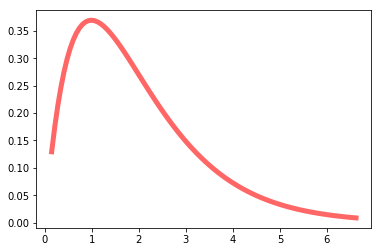

In [12]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, gamma.pdf(x, a),'r-', lw=5, alpha=0.6, label='gamma pdf')

In [13]:
gamma.ppf(0.99, a)

6.6197183461844284

In [14]:
[gamma.pdf(x, a) for x in range(1,6)]


[0.3694261323932544,
 0.26993103942135793,
 0.1483503897331003,
 0.07255770857489198,
 0.03329124140037971]

In [ ]:
popt,pcov = curve_fit(gamma.ppf,x,y,p0=[1,mean,sigma])

In [18]:
df = pd.read_csv('HWAssignment_Dataset.csv')
dfK8Math = df[df['AssessmentSubject'] == 'Math']

df2016_2017 = dfK8Math.loc[dfK8Math['SchoolYear'] == '2016-2017']
df2017_2018 = dfK8Math.loc[dfK8Math['SchoolYear'] == '2017-2018']

# Track Students (one year to the next). Will include effect of returning, leaving and entering students into Aspire
studentsMath3to7_2017 = df2016_2017.loc[df['Student_Grade_Level'].isin(['03','04', '05', '06', '07'])]
studentsMath4to8_2018 = df2017_2018.loc[df['Student_Grade_Level'].isin(['04', '05', '06', '07','08'])]

# Track Schools (Same grades across years)
schoolMath4to7_2017 = df2016_2017.loc[df['Student_Grade_Level'].isin(['04','05', '06', '07'])]
schoolMath4to8_2018 = df2017_2018.loc[df['Student_Grade_Level'].isin(['04', '05', '06', '07'])]

In [22]:
def gammacurve(x,a,scale):
    return scale * gamma.pdf(a,x)

In [33]:
y = list(schoolMath4to8_2018['PercentScore'])
a = .5
scale = .5
x = np.linspace(gamma.ppf(0.01, a),gamma.ppf(0.99, a), len(y))
popt,pcov = curve_fit(gammacurve,x,y,p0=[a,scale])

In [34]:
popt

array([1.14542725, 1.39517181])

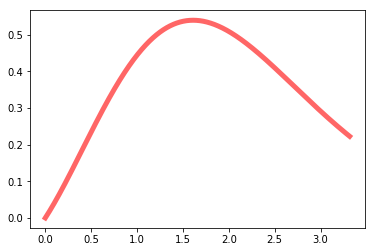

In [35]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, gammacurve(x,*popt),'r-', lw=5, alpha=0.6, label='gamma pdf')